In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

# 1. Parâmetros
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# 2. Carregar o dataset com TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'horses_or_humans',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# 3. Pré-processamento e aumentação
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE)\
                   .map(augment, num_parallel_calls=AUTOTUNE)\
                   .shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=AUTOTUNE)\
                 .batch(BATCH_SIZE).prefetch(AUTOTUNE)

# 4. Modelo com MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Congela as camadas da base

# 5. Construção do modelo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binária: horse (0) vs human (1)
])

# 6. Compilar e treinar
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test
)

# 7. Avaliação final
loss, acc = model.evaluate(ds_test)
print(f"\n📊 Acurácia no teste: {acc:.4f}")



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.65M3MB_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.65M3MB_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7383 - loss: 0.5240 - val_accuracy: 0.9531 - val_loss: 0.1470
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9990 - loss: 0.0513 - val_accuracy: 0.9688 - val_loss: 0.0832
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9993 - loss: 0.0252 - val_accuracy: 0.9766 - val_loss: 0.0697
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9976 - loss: 0.0182 - val_accuracy: 0.9805 - val_loss: 0.0567
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9982 - loss: 0.0140 - val_accuracy: 0.9805 - val_loss: 0.0514
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9882 - loss: 0.0371

📊 Acurácia no teste: 0.9805


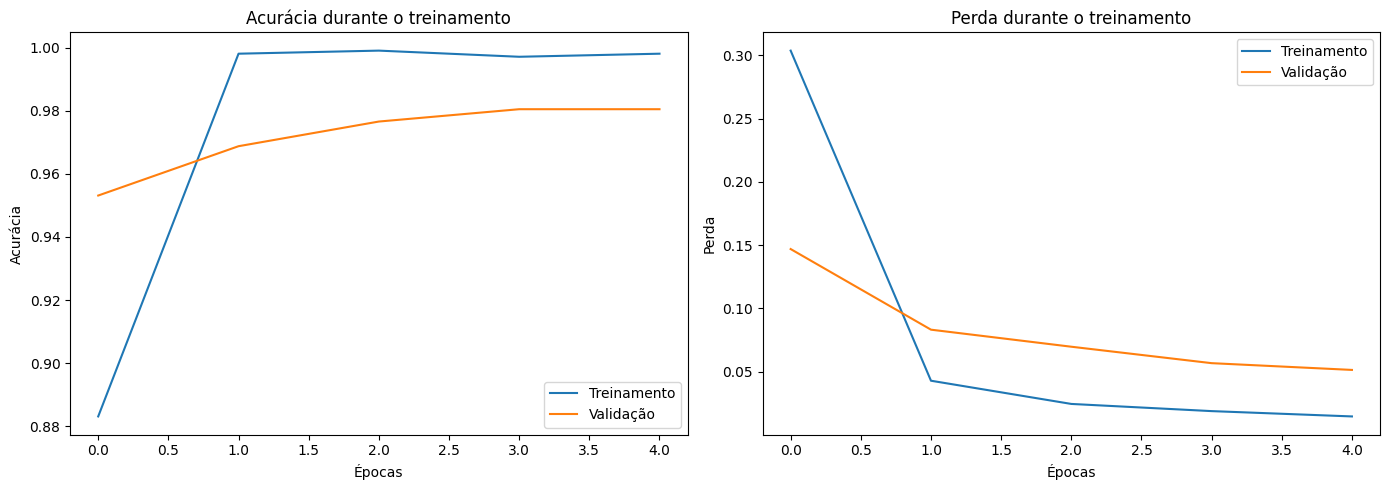

In [4]:
import matplotlib.pyplot as plt

# Extraindo os dados do histórico
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plotando acurácia
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treinamento')
plt.plot(epochs_range, val_acc, label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')

# Plotando perda
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treinamento')
plt.plot(epochs_range, val_loss, label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
